<a href="https://colab.research.google.com/github/dpriyabijosh/Depression_detection/blob/main/DepressionDetection_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

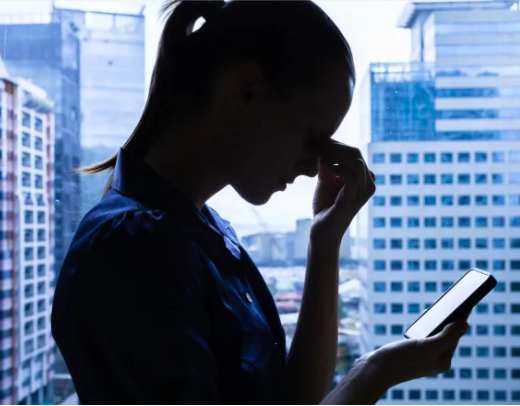

Depression is a mental illness that affects the quality of life which can lead to suicide. The major problem of the illness is that the chance of not knowing about the symptoms are very high. As per WHO, 280 million people world-wide suffer with this illness. The illness got worse due to the pandemic situation and a lot of people committed suicide which makes the importance to detect it in the early stages (Stephen & Prabu, 2019). It can be quite challenging for health care organisations to identify depression in the early stages because people are reluctant to seek care when necessary or uninformed of their mental state. In this era, people are very comfortable expressing their emotions in social media as posts, messages, and comments rather than speaking or sharing their emotions to other individuals (Burdisso et al., 2019). Social networking platforms represent a person‚Äôs personal life (Stephen & Prabu, 2019) which can be used for identifying the symptoms of mental illness such as depression by using natural language processing (NLP) with machine learning(ML) techniques. 

This implementation is to create a framework to detect early stage depression symptoms using different machine learning models.

## 1. Install and Load Essential Libraries

In [ ]:
!pip install wordcloud
!pip install nltk
!pip install contractions
import contractions
import os
import re
import nltk
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from google.colab import drive
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
import gensim 
from gensim.models import Word2Vec 
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm.notebook import trange, tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import wordnet
from textblob import TextBlob
from nltk.tokenize import TweetTokenizer
import torch

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 287 kB 16.5 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 110 kB 30.0 MB/s 


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## 2. Set up GPU for training

Google Colab offers free GPUs and TPUs. Since we'll be training a large neural network it's best to utilize these features.

A GPU can be added by going to the menu and selecting:

`Runtime -> Change runtime type -> Hardware accelerator: GPU`

Then we need to run the following cell to specify the GPU as the device.

In [ ]:
import torch
def set_Cuda():
  if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))
  else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

# 3. Dataset

# Data Wrangling and EDA
The data file is uploaded to drive and fetching the data by connecting to google drive which contains 8000 depressed and 2314 non-depressed tweets. All observations are annotated: 0 means non-depressed and 1 means depressed.

We will be renaming the old columns to meaningful `tweet` and `label`  corresponding to the column values and dropping the unwanted user id column.

In [ ]:
def initail_dataload():
    # Connect to google drive
    drive.mount('/content/drive')
    path="/content/drive/My Drive/Colab Notebooks"
    os.chdir(path)

    # Load data and set labels
    data_original = pd.read_csv('/content/drive/My Drive/Colab Notebooks/depression_dataset_case2.csv',lineterminator='\n')

    # Display 5 random samples
    return data_original

#Need to remove the underline code

In [ ]:
data = initail_dataload()

#View data
data.sample(5)

Mounted at /content/drive


tweet  label
3264   Why you always talking about sex ? Do you get ...      0
10967  Agree with Dr. Foster's answer to "Do I have B...      1
4858        @ninthcompanion its add from elsword i think      0
1578           „Ç™„Éê„Éû„Åï„Çì„ÅÆÊîøÁ≠ñ„Çí„ÅÜ„Çì„Å¨„ÇìË®Ä„ÅÜ„ÅÆ„ÅØÂãùÊâã„Å†„Åë„Å©„ÄÅÂ••„Åï„Çì„ÅÆ„Åì„Å®„Åæ„ÅßË®Ä„ÅÜ„Å™ÔºÅÊó•Êú¨‰∫∫„ÅÆÊÅ•„ÇÑ      0
3539   I liked a @YouTube video https://t.co/4Mf51iL4...      0

In [ ]:
data.head()

tweet  label
0  happy birthday to my main squeeze. i luv you m...      0
1  Wonder how many lies I told last year smh..tha...      0
2  @thickbitchtyler I am sooo happy  and proud of...      0
3  Heyyyy, I don die! God abeg o no let me marry ...      0
4         I see no lies here https://t.co/4OtzyLoMCb      0

In [ ]:
data.tail()

tweet  label
11872  Hey if any of you cut yourself or used too.. I...      1
11873  I'm diagnosed with depression but I'm not cutt...      1
11874  @TweetsEncourage @SoBlessedKyrie I'm diagnosed...      1
11875  I'm diagnosed with depression... I don't tweet...      1
11876  When I think about it, I know I'm diagnosed wi...      1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11877 entries, 0 to 11876
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   11877 non-null  object
 1   label   11877 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 185.7+ KB


In [ ]:
#check for null
data.isnull().sum()

tweet    0
label    0
dtype: int64

The data is not having any null values. So we don't need to do any imputation techniques.

In [ ]:
#count for each class
data.label.value_counts()

1    6493
0    5384
Name: label, dtype: int64

In [ ]:
import seaborn as sns
def checkDistribution(target, title,xlabel, ylabel):
  b = sns.countplot(x=target,facecolor =(0,0,0,0),linewidth = 5, edgecolor = sns.color_palette("dark",3))
  plt.xlabel(xlabel, fontsize =15)
  plt.ylabel(ylabel, fontsize = 15)
  plt.title(title)
  x_label = ["Non-depressed", "Depressed"]
  b.set_xticklabels(x_label, fontsize = 12 )

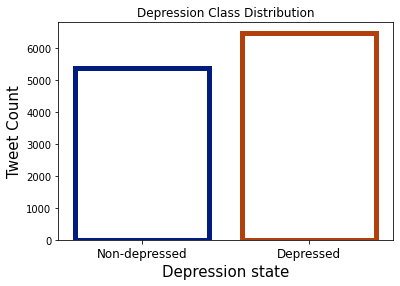

In [ ]:
checkDistribution(data['label'], 'Depression Class Distribution', 'Depression state', 'Tweet Count')

The data is heavly imbalanced with 8000 non-depressed and 2314 depressed data.

##Creating WordCloud

In [ ]:
def wordcloud(data, value, text_column):
  words = ' '.join(list(data[data['label'] == value][text_column]))
  set_wordcloud = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(words)
  plt.figure(figsize = (10, 8), facecolor = 'k')
  plt.imshow(set_wordcloud)
  plt.axis('off')
  plt.tight_layout(pad = 0)
  plt.show()

### Depressive WordCloud

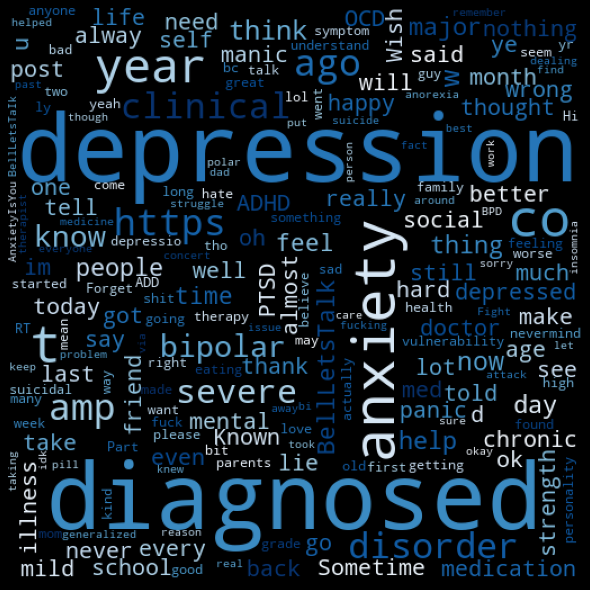

In [ ]:
wordcloud(data, 1, 'tweet')

###Non-depressive wordCloud

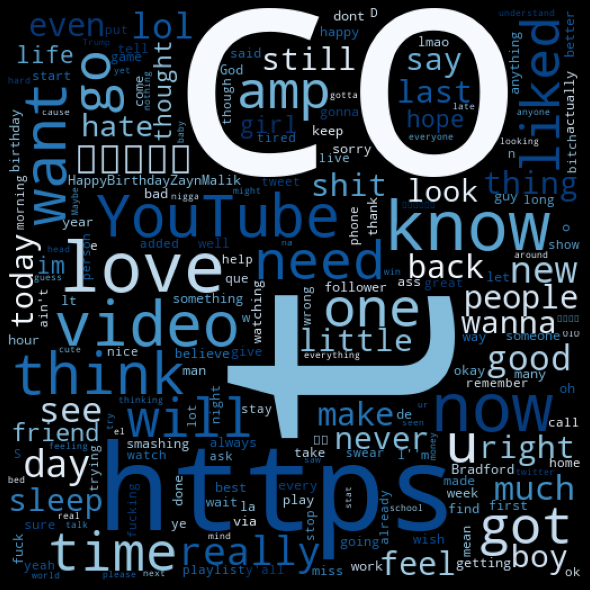

In [ ]:
wordcloud(data, 0, 'tweet')

##Feature Engineering: New features 
Compare with base and then find these features will make any impact on the model performance

In [ ]:
data_feature = data.copy()

In [ ]:
from nltk.corpus.reader import string_category
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
def count_emoji(text):
    return text.count("Emoji")
def count_hashtag(text):
    return text.count("#")

data_feature['body_len'] = data_feature['tweet'].apply(lambda x: len(x) - x.count(" "))
data_feature['punct%'] = data_feature['tweet'].apply(lambda x: count_punct(x))
data_feature['hashtag%'] = data_feature['tweet'].apply(lambda x: count_emoji(x))
data_feature.head(5)

tweet  label  body_len  punct%  \
0  happy birthday to my main squeeze. i luv you m...      0       115     8.7   
1  Wonder how many lies I told last year smh..tha...      0        49     4.1   
2  @thickbitchtyler I am sooo happy  and proud of...      0       111     3.6   
3  Heyyyy, I don die! God abeg o no let me marry ...      0       116    10.3   
4         I see no lies here https://t.co/4OtzyLoMCb      0        37    13.5   

   hashtag%  
0         0  
1         0  
2         0  
3         0  
4         0

In [ ]:
def create_hist(data, new_feature_nm):
  bins = np.linspace(0, 1, 10)
  plt.hist(data[data['label']==0][new_feature_nm], bins=10, alpha=0.5,  label= 'Non-depressed')
  plt.hist(data[data['label']==1][new_feature_nm], bins=10, alpha=0.5,  label='Depressed')
  plt.legend(loc='upper right')
  plt.show()

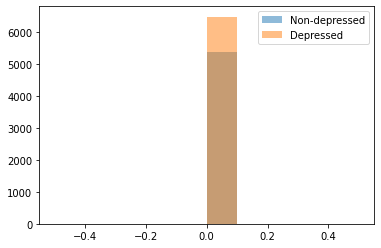

In [ ]:
create_hist(data_feature,'hashtag%')

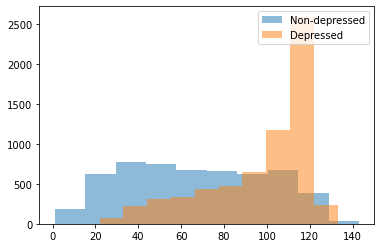

In [ ]:
create_hist(data_feature,'body_len')

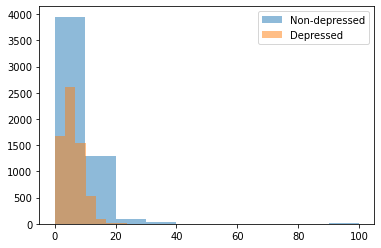

In [ ]:
create_hist(data_feature,'punct%')

### 3. Preprocessing

In the bag-of-words model, a text is represented as the bag of its words, disregarding grammar and word order. Therefore, we will want to remove stop words, punctuations and characters that don't contribute much to the sentence's meaning.

In [ ]:
#Define punctuation symbols
punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~‚Ä¢@'      

#Functions to clean tweets
def remove_links(tweet):
    """Takes a string and removes web links from it"""
    tweet = re.sub(r'http\S+', '', tweet)   # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet)  # remove bitly links
    tweet = tweet.strip('[link]')   # remove [links]
    tweet = re.sub(r'pic.twitter\S+','', tweet)
    return tweet

def remove_username(tweet):
    """Takes a string and removes retweet and @user information"""
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove re-tweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove tweeted at
    return tweet

def remove_hashtags(tweet):
    """Takes a string and removes any hash tags"""
    tweet = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove hash tags
    return tweet

def remove_av(tweet):
    """Takes a string and removes AUDIO/VIDEO tags or labels"""
    tweet = re.sub('VIDEO:', '', tweet)  # remove 'VIDEO:' from start of tweet
    tweet = re.sub('AUDIO:', '', tweet)  # remove 'AUDIO:' from start of tweet
    return tweet

def remove_stopword(tweet):
    # Remove stopwords except 'not' and 'can'
    tweet = " ".join([word for word in tweet.split()
                  if word not in stopwords.words('english')
                  or word in ['not', 'can']])
    return tweet

""" Replaces contractions from a string to their equivalents """
contraction_patterns = [ (r'won\'t', 'will not'), (r'can\'t', 'cannot'), (r'i\'m', 'i am'), (r'ain\'t', 'is not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)n\'t', '\g<1> not'),
                         (r'(\w+)\'ve', '\g<1> have'), (r'(\w+)\'s', '\g<1> is'), (r'(\w+)\'re', '\g<1> are'), (r'(\w+)\'d', '\g<1> would'), (r'&', 'and'), (r'dammit', 'damn it'), (r'dont', 'do not'), (r'wont', 'will not') ]
def replaceContraction(text):
    patterns = [(re.compile(regex), repl) for (regex, repl) in contraction_patterns]
    for (pattern, repl) in patterns:
        (text, count) = re.subn(pattern, repl, text)
    return text

def replaceElongated(word):
    """ Replaces an elongated word with its basic form, unless the word exists in the lexicon """
    repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
    repl = r'\1\2\3'
    if wordnet.synsets(word):
        return word
    repl_word = repeat_regexp.sub(repl, word)
    if repl_word != word:      
        return replaceElongated(repl_word)
    else:       
        return repl_word

def autoCorrectSentence(sentence):
    sentence = TextBlob(sentence)
    result = sentence.correct()
    return result

def basic_clean(tweet):
    """Main master function to clean tweets only without tokenization or removal of stopwords"""
    tweet = remove_username(tweet)
    tweet = remove_links(tweet)
    tweet = remove_hashtags(tweet)
    tweet = remove_av(tweet)
    tweet = remove_stopword(tweet)
    tweet = tweet.lower() 
    tweet = replaceContraction(tweet)
     # lower case
    tweet = re.sub(r"\'t", " not", tweet) # replace /t to not
    tweet = re.sub('[' + punctuation + ']+', ' ', tweet)  # strip punctuation
    tweet = re.sub(r"emoji"," ",tweet)
    tweet = re.sub('\s+', ' ', tweet)  # remove double spacing
    #tweet = re.sub('([0-9]+)', '', tweet)  # remove numbers
    tweet = re.sub('üìù ‚Ä¶', '', tweet)
    tweet = re.sub(r'([\'\"\.\(\)\!\?\\\/\,])', r' \1 ', tweet)  # Isolate and remove punctuations except '?'
    tweet = re.sub(r'[^\w\s\?]', ' ', tweet)
    #tweet = re.sub(r'([\;\:\|‚Ä¢¬´\n])', ' ', tweet) # Remove some special characters
    tweet = re.sub(r'\s+', ' ', tweet).strip() # Remove trailing whitespace   
    tweet = re.sub('[^a-zA-Z\']', ' ', tweet) # Replace everything not a letter or apostrophe with a space
    tweet = ' '.join( [w for w in tweet.split() if len(w)>1] ) # Remove single letter words
    return tweet

In [ ]:
data['tweet'] = data.tweet.apply(basic_clean)

In [ ]:
data.head()

tweet  label
0  happy birthday main squeeze luv mazzoni cannot...      0
1  wonder many lies told last year smh that shit ...      0
2  sooo happy proud tyty king love much love more...      0
3  heyyyy die god abeg let marry diz kain useless...      0
4                                           see lies      0

In [ ]:
data.tail()

tweet  label
11872  hey cut used too am used to also am diagnosed ...      1
11873  am diagnosed depression am not cutting wanting...      1
11874  am diagnosed depression bipolar adhd am also s...      1
11875  am diagnosed depression tweet sad shit so one ...      1
11876  when think it know am diagnosed depression anx...      1

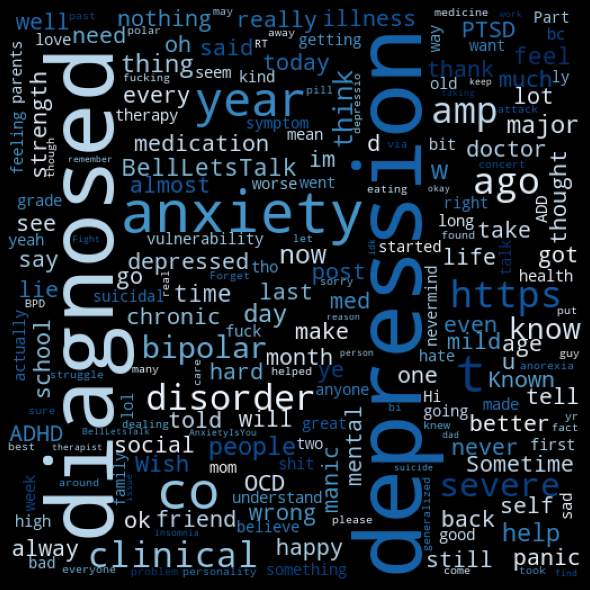

In [ ]:
#Depressive wordCloud
wordcloud(data, 1, 'tweet')

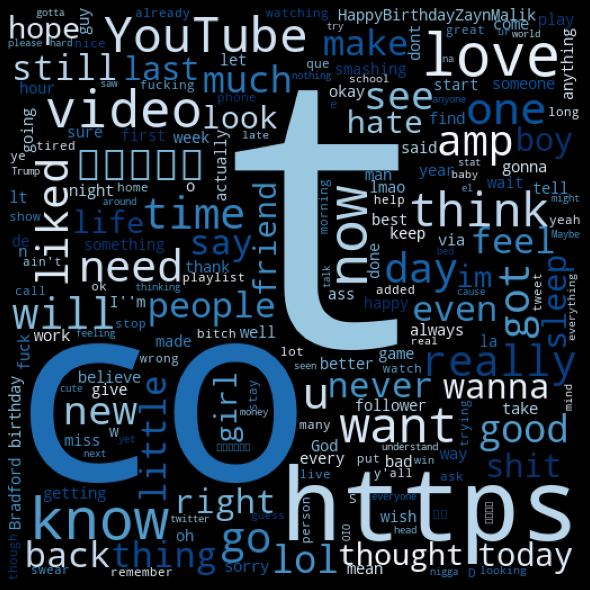

In [ ]:
#Non-depressive wordCloud
wordcloud(data, 0, 'tweet')

## Data cleaning after pre-processing the data

In [ ]:
# Remove rows with empty tweets
print('Total number of empty tweets\n',data[data['tweet']==''].sum())
print(data.shape)

Total number of empty tweets
 tweet    0.0
label    0.0
dtype: float64
(11877, 2)


In [ ]:
def clean_empty_rows(data,column):
  print('Initial size', data.shape)
  sum = data[data[column]==''].sum()
  filter = data[column] != ""
  data = data[filter]
  print('Shape after cleaning',data.shape)
  return data

In [ ]:
data = clean_empty_rows(data,'tweet')

Initial size (11877, 2)
Shape after cleaning (11877, 2)


#Lemmatization

In the bag-of-words model, a text is represented as the bag of its words, disregarding grammar and word order. Therefore, we will want to remove stop words, punctuations and characters that don't contribute much to the sentence's meaning.

In [ ]:
def lemmatize(tweet):
    """Returns tokenized representation of words in lemma form excluding stopwords"""
    result = []
    for tweet in gensim.utils.simple_preprocess(tweet):
        #if (tweet not in gensim.parsing.preprocessing.STOPWORDS or tweet not in ['not', 'can']):  # drops words with 3 or less characters
            result.append(lemmatize_stemming(tweet))
    return result


def lemmatize_stemming(token):
    """Returns lemmatization of a token"""
    return WordNetLemmatizer().lemmatize(token, pos='v')


def clean_tweet(tweets, bigrams=False):
    """Main master function to clean tweets, stripping noisy characters and tokenizing use lemmatization"""
    tweet = basic_clean(tweets)
    tweet_token_list = lemmatize(tweet)  # apply lemmatization and tokenization

    if bigrams:
        tweet_token_list = tweet_token_list + [tweet_token_list[i] + '_' + tweet_token_list[i + 1]
                                               for i in range(len(tweet_token_list) - 1)]
    tweet = ' '.join(tweet_token_list)
    return tweet


def tokenize_tweets(tweets):
  tokenizer=TweetTokenizer()
  print(tokenizer.tokenize(tweets.lower()))
  return tokenizer.tokenize(tweets.lower())

### Apply Lemmatization on the cleaned data

In [ ]:
#data['tokenize_tweet'] = data['tweet'].apply(tokenize_tweets)
data['tweet'] = data['tweet'].apply(clean_tweet)

In [ ]:
data.head(5)

tweet  label
0  happy birthday main squeeze luv mazzoni cannot...      0
1  wonder many lie tell last year smh that shit b...      0
2  sooo happy proud tyty king love much love more...      0
3  heyyyy die god abeg let marry diz kain useless...      0
4                                            see lie      0

In [ ]:
data = clean_empty_rows(data,'tweet')

Initial size (11877, 2)
Shape after cleaning (11315, 2)


In [ ]:
# Function to retrieve cleaned data
def final_clean_data():
  data = initail_dataload()
  #Rename the columns
  data.rename(columns={'raw_tweet' :'tweet'},inplace=True)
  data['tweet'] = data['tweet'].apply(clean_tweet)
  data = clean_empty_rows(data,'tweet')
  return data
final_clean_data()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                                   tweet  label
0      happy birthday to my main squeeze. i luv you m...      0
1      Wonder how many lies I told last year smh..tha...      0
2      @thickbitchtyler I am sooo happy  and proud of...      0
3      Heyyyy, I don die! God abeg o no let me marry ...      0
4             I see no lies here https://t.co/4OtzyLoMCb      0
...                                                  ...    ...
11872  Hey if any of you cut yourself or used too.. I...      1
11873  I'm diagnosed with depression but I'm not cutt...      1
11874  @TweetsEncourage @SoBlessedKyrie I'm diagnosed...      1
11875  I'm diagnosed with depression... I don't tweet...      1
11876  When I think about it, I know I'm diagnosed wi...      1

[11877 rows x 2 columns]
Initial size (11877, 2)
Shape after cleaning (11315, 2)


tweet  label
0      happy birthday main squeeze luv mazzoni cannot...      0
1      wonder many lie tell last year smh that shit b...      0
2      sooo happy proud tyty king love much love more...      0
3      heyyyy die god abeg let marry diz kain useless...      0
4                                                see lie      0
...                                                  ...    ...
11872  hey cut use too be use to also be diagnose dep...      1
11873  be diagnose depression be not cut want die guy...      1
11874  be diagnose depression bipolar adhd be also st...      1
11875  be diagnose depression tweet sad shit so one e...      1
11876  when think it know be diagnose depression anxi...      1

[11315 rows x 2 columns]